In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from statistics import mean
from matplotlib import style
style.use('ggplot')
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Bike Sharing hour.csv')
list(df)
df.drop(['dteday'],1,inplace = True)
df.drop(['instant'],1,inplace = True)
full_data = df.astype(float).values.tolist()


In [3]:
header = list(df)

In [4]:
xs = np.array(full_data)[:,:-1]
ys = np.array(full_data)[:,-1]

In [5]:
x = xs[:,-2]
x

array([ 3.,  8.,  5., ...,  7., 13., 12.])

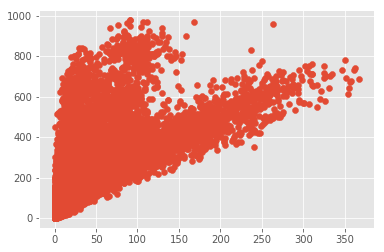

In [6]:
plt.scatter(x,ys)

In [7]:
def origin_shift(x,y):
    return x - np.mean(x) , y-np.mean(y)

In [8]:
def pred_y(m,x):
    return m*x

In [9]:
def calc_SSE(y,pred_y):
    return np.linalg.norm(y-pred_y)

In [10]:
X,Y = origin_shift(x,ys)

In [11]:
m = 0
y_hat = pred_y(m,X)

In [12]:
y_hat
calc_SSE(Y,y_hat)

23911.536777687823

In [13]:
alpha = 0.1
m = 0
m_list = []
prev_SSE = 99999999
curr_SSE = 0
i = 0
def reg_line(m,X,Y,m_list,prev_SSE,curr_SSE,alpha):
    if(alpha < 0.00001):
        return m , m_list
    y_hat = pred_y(m,X)
    m_list.append(m)
    curr_SSE = calc_SSE(Y,y_hat)
    if(curr_SSE <= prev_SSE):
        prev_SSE = curr_SSE
        m+=alpha
        return reg_line(m,X,Y,m_list,prev_SSE,curr_SSE,alpha)
    else:
        m = m_list[-10]
        for i in range(10):
            m_list.remove(m_list[-1])
        prev_SSE = 999999
        alpha*=0.1
        m+=alpha
        return reg_line(m,X,Y,m_list,prev_SSE,curr_SSE,alpha)

m,m_list = reg_line(m,X,Y,m_list,prev_SSE,curr_SSE,alpha)

In [14]:
m
c = np.mean(ys)
c

189.46308763450142

In [15]:
m_list

[0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999,
 0.9999999999999999,
 1.0999999999999999,
 1.2,
 1.3,
 1.4000000000000001,
 1.5000000000000002,
 1.6000000000000003,
 1.7000000000000004,
 1.8100000000000005,
 1.8200000000000005,
 1.8300000000000005,
 1.8400000000000005,
 1.8500000000000005,
 1.8600000000000005,
 1.8700000000000006,
 1.8800000000000006,
 1.8900000000000006,
 1.9000000000000006,
 1.9100000000000006,
 1.9200000000000006,
 1.9300000000000006,
 1.9400000000000006,
 1.9500000000000006,
 1.9600000000000006,
 1.9700000000000006,
 1.9800000000000006,
 1.9900000000000007,
 2.0000000000000004,
 2.0100000000000002,
 2.02,
 2.03,
 2.0399999999999996,
 2.0499999999999994,
 2.059999999999999,
 2.069999999999999,
 2.0799999999999987,
 2.0899999999999985,
 2.0999999999999983,
 2.109999999999998,
 2.119999999999998,
 2.1299999999999977,
 2.1399999999999975,
 2.1499999999999972,
 2.159999999999997,
 2.169999999999997,
 2.179999999999

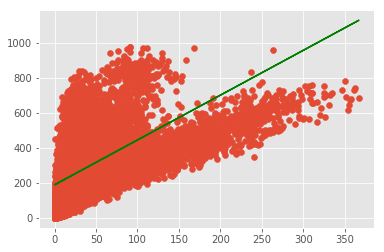

In [16]:
plt.scatter(x,ys)
plt.plot(x,m*x+c , color = 'g')

In [17]:

def reg_line_anim(x,ys,m_list,c):
    fig = plt.figure()
    ax = fig.gca()
    t = []
    t.append(x)
    t.append(c)
    t = tuple(t)
    ax.scatter(x,ys)
    line, = ax.plot(x,(m_list[0]*x)+c,color = 'g')
    def update(m,x,c):
        line.set_data(x,m*x+c)
        return line

    fig.canvas.draw()
    ani = matplotlib.animation.FuncAnimation(fig, update, frames=m_list, blit=False, interval=10, fargs = t )
    plt.show()

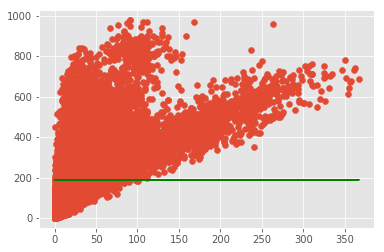

In [18]:
reg_line_anim(x,ys,m_list,c)